# AIRLINE PASSENGER SATISFACTION ANALYSIS


### OBJECTIVE

### To analyze and understand the factors that influence the passenger satisfaction and improve the overall customer experience.

## INTRODUCTION

### Airline passenger satisfaction is crucial for the aviation industry as it directly impacts customer retention, airline reputation, and overall business success. A machine learning project aimed at predicting airline passenger satisfaction seeks to use historical data to analyze factors influencing passenger experiences and predict whether a passenger is likely to be satisfied or dissatisfied with their flight.



##DATA STORY

The Airline Passenger Satisfaction dataset includes 129880 rows and 24 columns.The dataset contains many informations like flight distance,type of travel,class and passenger ratings on various sevices like seat comfort ,leg room service ,in flight service ,cleanliness ....

LOADING LIABRIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stat
import pylab
import seaborn as sns
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#save the model
import pickle
import os

##LOAD DATASET

In [ ]:
df=pd.read_csv("airline_passenger_satisfaction.csv")

##DATASET DESCRIBTION

In [ ]:
def BasicEDA(df):
    print(f"First 5 Row of dataframe is \n{df.head()}")
    print("=======================================\n")
    print(f"List of columns in dataframe is {df.columns}")
    print("=======================================\n")
    print(f"The shape of dataframe is {df.shape}")
    print("=======================================\n")
    print(f"Description about dataframe Numerical columns :\n{df.describe()}")
    print("=======================================\n")
    print(f"Description about dataframe Categorical columns :\n {df.describe(include='O')}")
    print("=======================================\n")
    print(f"Information about the data type of the dataframe : \n{df.info()}")
    print("=======================================\n")
    print(f"Number of nullvalues in dataframe is \n{df.isnull().sum()}")
    print("=======================================\n")
    print(f"Information about  duplicated rows :\n {df[df.duplicated()]}")
    print(f"{df.duplicated().sum()}  rows are duplicated")

BasicEDA(df)



First 5 Row of dataframe is 
   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort 

From the first insights from the data ,we can observe that there are 129880 rows and 24 columns,in which 19 columns are numerical variables and 5 columns are categorical variables. 5% of flight record have missing values in arrial delay time and zero duplicated rows.

In [ ]:
df['Arrival Delay'].mean()

15.09112883918849

In [ ]:
df['Arrival Delay'].median()


0.0

MISSING VALUE IMPUTATION

In [ ]:
df['Arrival Delay'].fillna(df['Arrival Delay'].median(),inplace=True)

In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0


In [ ]:
df['Satisfaction'].value_counts()

,count
Satisfaction,
Neutral or Dissatisfied,73452
Satisfied,56428


HANDLING OUTLIERS # deals with numerical features

In [ ]:
def numCat(df):
    numericalFeatures = df.select_dtypes(include=['number']).columns.tolist()
    categoricalFeatures = df.select_dtypes(include=['object']).columns.tolist()

    print(f"The Numerical Features are: \n {numericalFeatures}")

    print(f"The Categorical Features are: \n {categoricalFeatures}")

    return numericalFeatures, categoricalFeatures

df=pd.read_csv(r"airline_passenger_satisfaction.csv")
numericalFeatures, categoricalFeatures = numCat(df)


The Numerical Features are: 
 ['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']
The Categorical Features are: 
 ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']


In [ ]:
df.nunique()

,0
ID,129880
Gender,2
Age,75
Customer Type,2
Type of Travel,2
Class,3
Flight Distance,3821
Departure Delay,466
Arrival Delay,472
Departure and Arrival Time Convenience,6


# Visualization of Numerical fetures

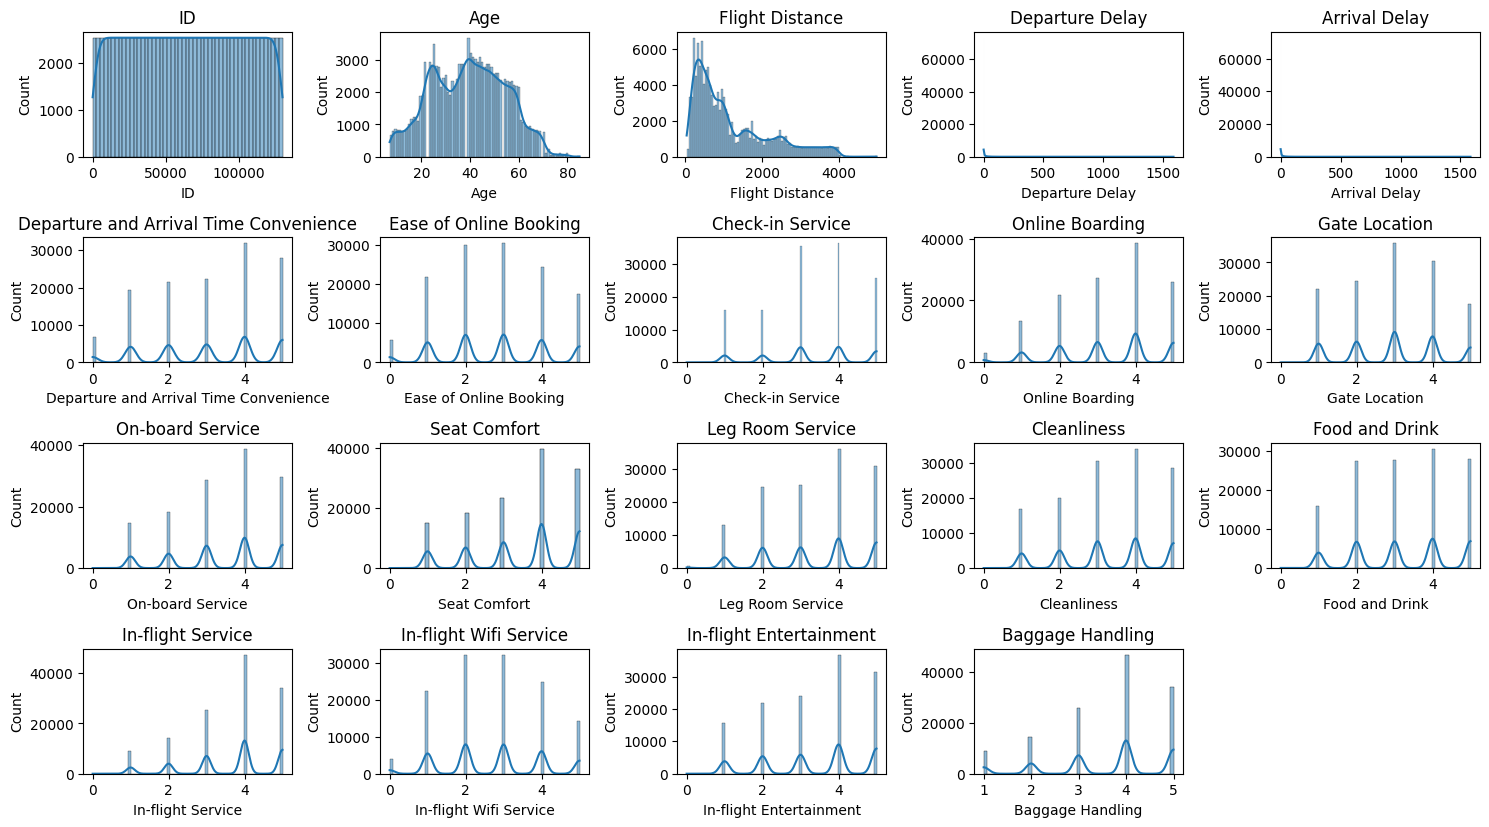

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))

df_num=df[numericalFeatures]
for i, column in enumerate(df_num.columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df_num[column], kde=True)
    plt.title(column)


plt.tight_layout()
plt.show()

The numerical feature is divided into continuous and fixed features.Numerical columns with fewer than 30 unique values is considered as fixed and greater than 30 is considered as continous.Outliers are deteced for continuous features

In [ ]:
def ContFixed(df):
    df_num=df[numericalFeatures]
    ContList=[]
    FixedList=[]
    for i in df_num.columns:
        if df_num[i].nunique()>=30:
            ContList.append(i)
        else:
            FixedList.append(i)
    return ContList,FixedList

df=pd.read_csv(r"airline_passenger_satisfaction.csv")
ContList,FixedList=ContFixed(df)

print (f"FixedList = {FixedList}")
print("\n")
print(f"ContList = {ContList}")


FixedList = ['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


ContList = ['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']


In [ ]:
df_num=df[numericalFeatures]

In [ ]:
df_cont=df_num[ContList]

In [ ]:
df_cont.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129
std,37493.270818,15.119360,997.452477,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000


In [ ]:
df_num['Arrival Delay'].fillna(df_num['Arrival Delay'].median(),inplace=True)

In [ ]:
df_num.isnull().sum()

,0
ID,0
Age,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0
Ease of Online Booking,0
Check-in Service,0
Online Boarding,0
Gate Location,0


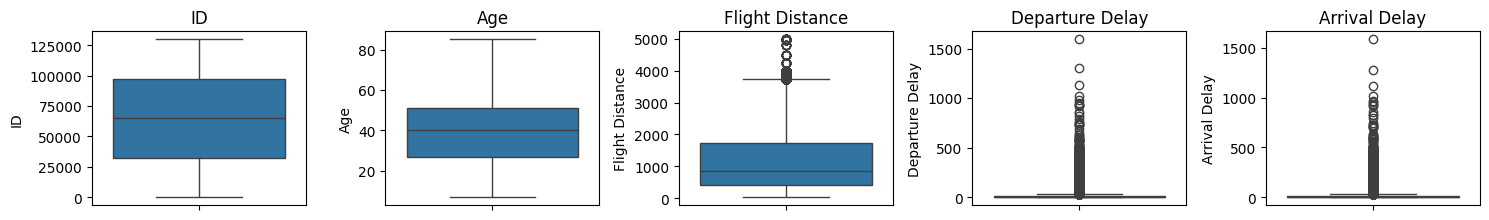

In [ ]:
# outlier detection

plt.figure(figsize=(15,10))
for i,column in enumerate(df_cont,1):
    plt.subplot(5,5,i)
    sns.boxplot(df_cont[column])
    plt.title(column)

plt.tight_layout()
plt.show()

From the above visualisation,features like Flight distance,Departure Delay and Arrival delay has got outliers.

### OUTLIER TREATMENT

Outliers are treated using IQR method

		 AFTER OUTLIER TREATMENT 



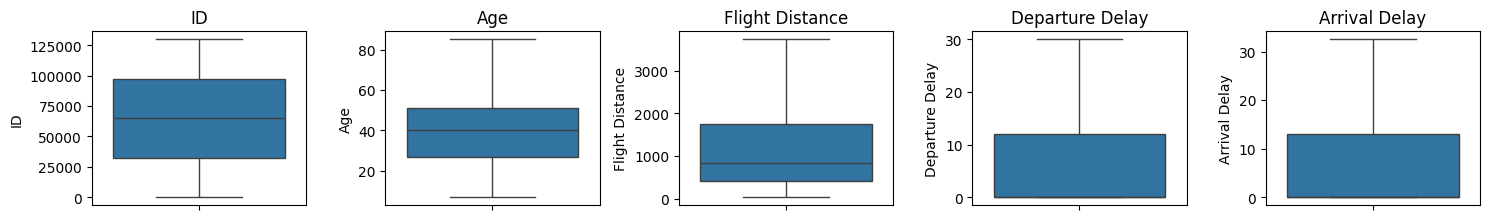

In [ ]:
def plot(df_cont):
    plt.figure(figsize=(15,10))
    for i,column in enumerate(df_cont,1):
        plt.subplot(5,5,i)
        sns.boxplot(df_cont[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()
    for i in df_cont.columns:
        Q3=df_cont[i].quantile(.75)
        Q1=df_cont[i].quantile(.25)
        IQR=Q3-Q1
        upper_limit=Q3+(1.5*IQR)
        lower_limit=Q1-(1.5*IQR)
        df_cont.loc[(df_cont[i]>upper_limit),i]=upper_limit
        df_cont.loc[(df_cont[i]<lower_limit),i]=lower_limit

print(f"\t\t AFTER OUTLIER TREATMENT \n")
df_num[ContList]=plot(df_cont)

In [ ]:
df_cont.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1186.995681,7.380798,7.933391
std,37493.270818,15.119360,988.394696,11.209935,11.981359
min,1.000000,7.000000,31.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000
max,129880.000000,85.000000,3739.000000,30.000000,32.500000


###SKEWNESS CHECK (histograms to check for skewness in numerical columns.)

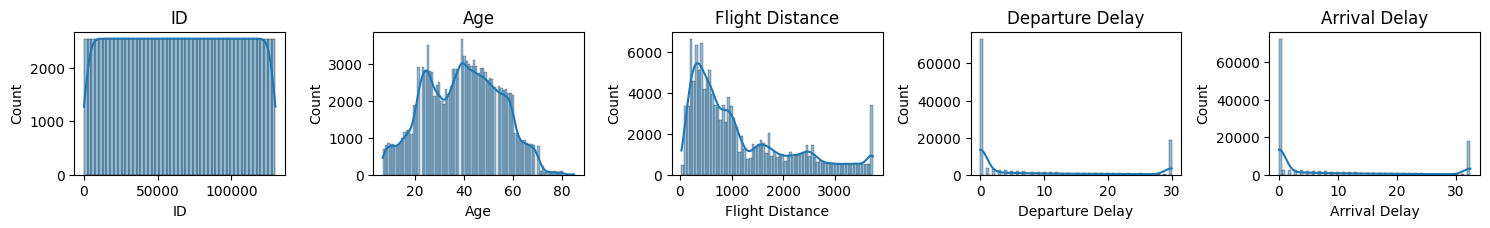

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))


for i, column in enumerate(df_cont.columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df_cont[column], kde=True)
    plt.title(column)


plt.tight_layout()
plt.show()

From the above histogram ,we can notice a right skew in the distribution of Flight Distance,so  boxcox transformation is used for handling the skewness.

## Skewness Correction Using boxcox transformatiom

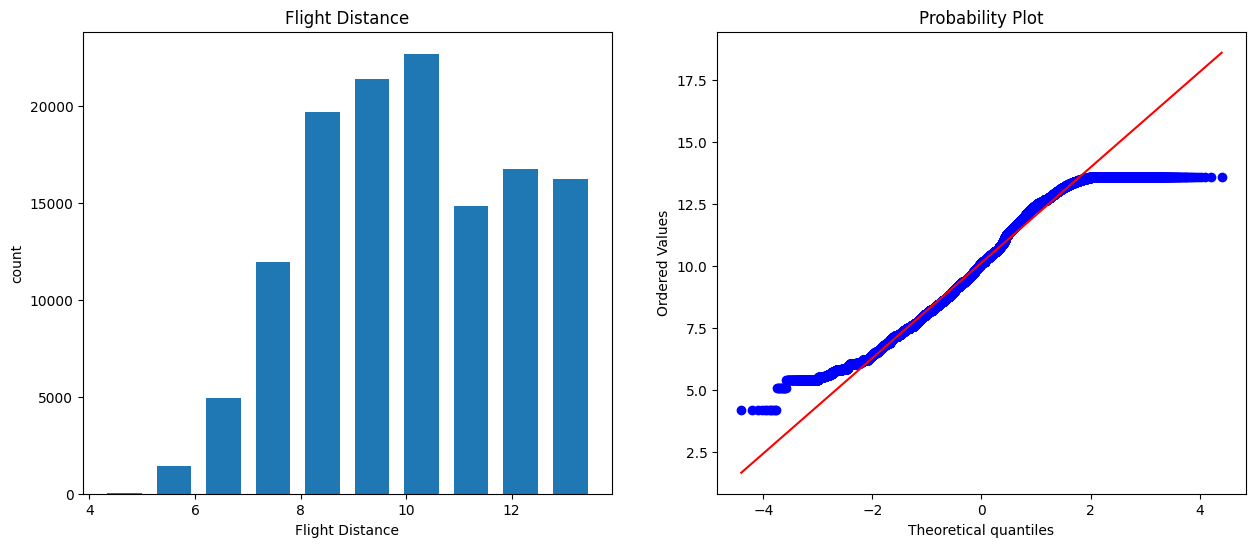

In [ ]:
df_cont['Flight Distance'],transval=stat.boxcox(df_cont['Flight Distance'])
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df_cont['Flight Distance'],rwidth=0.7)
plt.xlabel('Flight Distance')
plt.ylabel('count')
plt.title('Flight Distance')

plt.subplot(1,2,2)
stat.probplot(df_cont['Flight Distance'],dist='norm',plot=pylab)
plt.show()



In [ ]:
df_cont.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,10.130914,7.380798,7.933391
std,37493.270818,15.119360,1.944091,11.209935,11.981359
min,1.000000,7.000000,4.196263,0.000000,0.000000
25%,32470.750000,27.000000,8.637459,0.000000,0.000000
50%,64940.500000,40.000000,10.103861,0.000000,0.000000
75%,97410.250000,51.000000,11.724658,12.000000,13.000000
max,129880.000000,85.000000,13.577366,30.000000,32.500000


In [ ]:
df_fixd=df[FixedList]

In [ ]:
df_num=pd.concat([df_cont,df_fixd],axis=1)

In [ ]:
df_num

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,1.0,48,10.044750,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5
1,2.0,35,10.044750,26,32.5,2,2,3,5,2,5,4,5,5,3,5,2,5,5
2,3.0,41,10.126603,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3
3,4.0,50,11.931081,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5
4,5.0,49,13.388844,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876.0,28,8.789733,2,3.0,4,4,4,4,2,5,1,4,4,4,5,4,4,4
129876,129877.0,41,8.062427,0,0.0,5,3,5,3,4,5,2,5,2,2,4,3,2,5
129877,129878.0,42,8.235342,6,14.0,5,2,4,2,1,3,3,4,3,3,4,2,3,5
129878,129879.0,50,8.235342,30,22.0,4,4,3,4,1,4,4,5,3,3,4,5,3,5


CATEGORICAL ENCODING


Categorical encoding is done to tranform cetegorical features into numerical format.One_hot encoding is done.

In [ ]:
df_cat=df[categoricalFeatures]

In [ ]:
df_cat

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,Male,First-time,Business,Business,Neutral or Dissatisfied
1,Female,Returning,Business,Business,Satisfied
2,Male,Returning,Business,Business,Satisfied
3,Male,Returning,Business,Business,Satisfied
4,Female,Returning,Business,Business,Satisfied
...,...,...,...,...,...
129875,Male,Returning,Personal,Economy Plus,Neutral or Dissatisfied
129876,Male,Returning,Personal,Economy Plus,Neutral or Dissatisfied
129877,Male,Returning,Personal,Economy Plus,Neutral or Dissatisfied
129878,Male,Returning,Personal,Economy Plus,Satisfied


Visualization of Categorical features

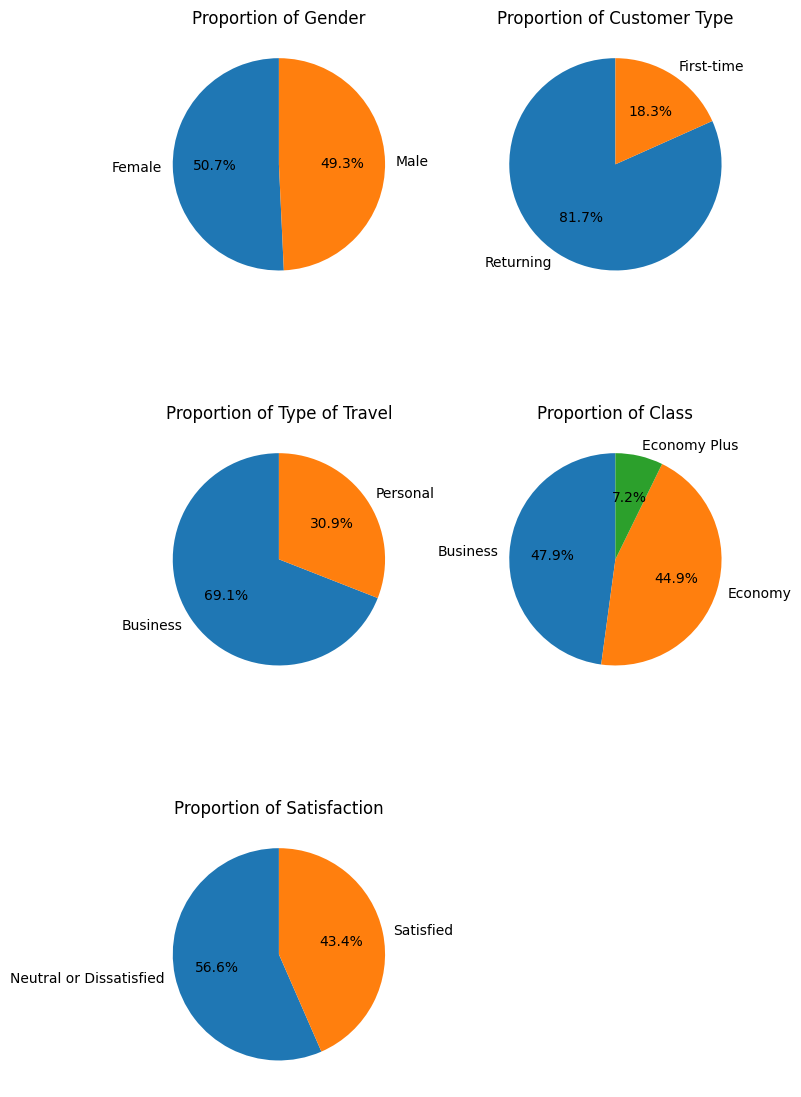

In [ ]:
def plot_pie_charts(df_cat):
    num_features = len(df_cat.columns)
    num_cols = 2
    num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

    plt.figure(figsize=(8, num_rows * 4))

    for i, column in enumerate(df_cat.columns):
        plt.subplot(num_rows, num_cols, i + 1)
        counts = df_cat[column].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Proportion of {column}')

    plt.tight_layout()
    plt.show()


plot_pie_charts(df[categoricalFeatures])

In [ ]:
#checking unique values in categorical features
for i in  categoricalFeatures:
    print(i,df[i].unique())

Gender ['Male' 'Female']
Customer Type ['First-time' 'Returning']
Type of Travel ['Business' 'Personal']
Class ['Business' 'Economy' 'Economy Plus']
Satisfaction ['Neutral or Dissatisfied' 'Satisfied']


In [ ]:
#checking the counts of categorical features
for i in  categoricalFeatures:
    print(i,df[i].value_counts())
    print("============================")

Gender Gender
Female    65899
Male      63981
Name: count, dtype: int64
Customer Type Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64
Type of Travel Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64
Class Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64
Satisfaction Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64


 Encoding categorical Features using one hotEncoder

In [ ]:

df_cat=df[categoricalFeatures]
oh_value=OneHotEncoder(drop='first',sparse_output=False)
df_cat= oh_value.fit_transform(df[categoricalFeatures])
df_cat=pd.DataFrame(df_cat,columns=oh_value.get_feature_names_out(categoricalFeatures))

print(df_cat)

        Gender_Male  Customer Type_Returning  Type of Travel_Personal  \
0               1.0                      0.0                      0.0   
1               0.0                      1.0                      0.0   
2               1.0                      1.0                      0.0   
3               1.0                      1.0                      0.0   
4               0.0                      1.0                      0.0   
...             ...                      ...                      ...   
129875          1.0                      1.0                      1.0   
129876          1.0                      1.0                      1.0   
129877          1.0                      1.0                      1.0   
129878          1.0                      1.0                      1.0   
129879          0.0                      1.0                      1.0   

        Class_Economy  Class_Economy Plus  Satisfaction_Satisfied  
0                 0.0                 0.0              

In [ ]:
final_df=pd.concat([df_num,df_cat],axis=1)
print(final_df)

              ID  Age  Flight Distance  Departure Delay  Arrival Delay  \
0            1.0   48        10.044750                2            5.0   
1            2.0   35        10.044750               26           32.5   
2            3.0   41        10.126603                0            0.0   
3            4.0   50        11.931081                0            0.0   
4            5.0   49        13.388844                0            1.0   
...          ...  ...              ...              ...            ...   
129875  129876.0   28         8.789733                2            3.0   
129876  129877.0   41         8.062427                0            0.0   
129877  129878.0   42         8.235342                6           14.0   
129878  129879.0   50         8.235342               30           22.0   
129879  129880.0   20         8.235342                0            0.0   

        Departure and Arrival Time Convenience  Ease of Online Booking  \
0                                    

In [ ]:
final_df = final_df.drop(columns=['ID'],axis=1)

##BIVARIANT ANALYSIS

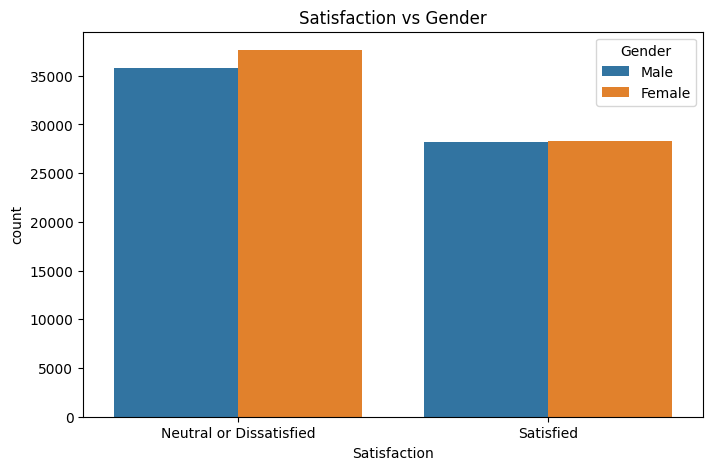

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Satisfaction', hue='Gender', data=df)
plt.title('Satisfaction vs Gender')
plt.show()

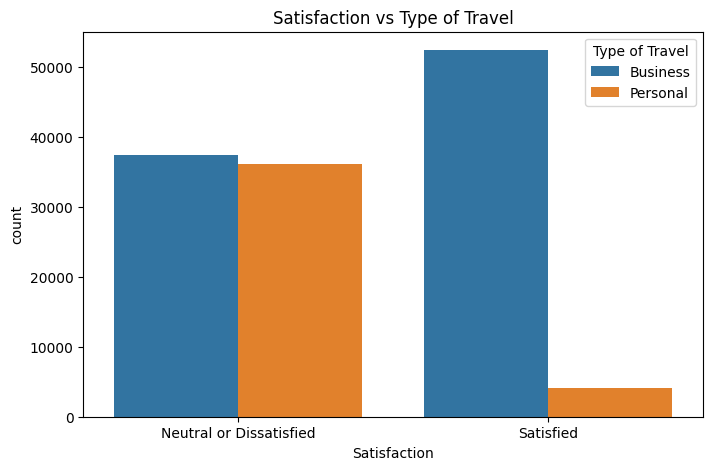

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Satisfaction', hue='Type of Travel', data=df)
plt.title('Satisfaction vs Type of Travel')
plt.show()

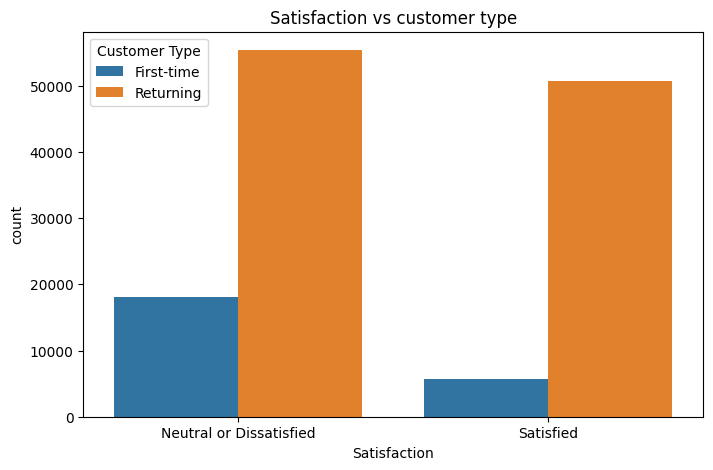

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Satisfaction', hue='Customer Type', data=df)
plt.title('Satisfaction vs customer type')
plt.show()

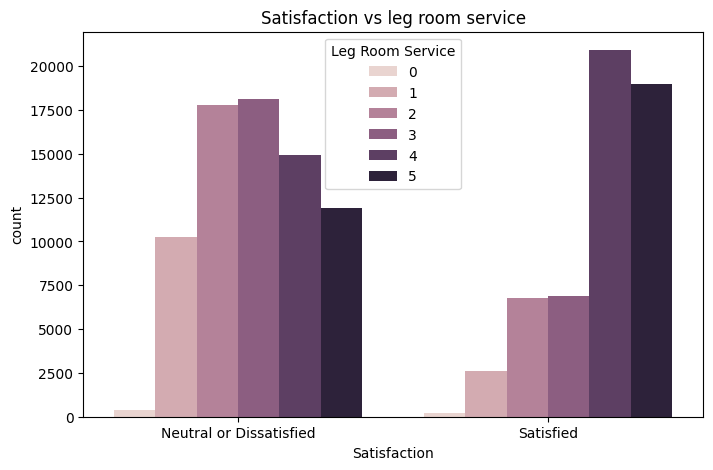

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Satisfaction', hue='Leg Room Service', data=df)
plt.title('Satisfaction vs leg room service')
plt.show()

## 🇫​🇪​🇦​🇹​🇺​🇷​🇪​ 🇸​🇪​🇱​🇪​🇨​🇹​🇮​🇴​🇳​ 🇺​🇸​🇮​🇳​🇬​ 🇨​🇴​🇷​🇷​🇪​🇱​🇦​🇹​🇮​🇴​🇳​ 🇲​🇦​🇹​🇷​🇮​🇽​ 🇹​🇪​🇨​🇭​🇳​🇮​🇶​🇺​🇪​

Correlaton matrix technique is used here to identify which features are most strongly related to our target variable.Features with more correalation are used for feature modelling and those with low correalation are removed

In [ ]:
final_df.corr()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied
Age,1.000000,0.067698,-0.007876,-0.010923,0.036960,0.022565,0.033475,0.207572,-0.000398,0.057078,...,-0.051347,0.016116,0.074947,-0.047991,0.008996,0.284172,-0.044808,-0.132597,-0.012922,0.134091
Flight Distance,0.067698,1.000000,0.012058,0.000139,-0.003542,0.072797,0.076538,0.199922,0.003410,0.102768,...,0.061783,0.008255,0.109094,0.064890,0.004111,0.199917,-0.226312,-0.361405,-0.114949,0.258785
Departure Delay,-0.007876,0.012058,1.000000,0.841526,-0.001224,-0.006781,-0.025019,-0.030751,0.006788,-0.032873,...,-0.038076,-0.025683,-0.030812,-0.016646,0.001928,-0.004828,-0.006025,0.005475,0.007260,-0.074264
Arrival Delay,-0.010923,0.000139,0.841526,1.000000,-0.002437,-0.009447,-0.035407,-0.042182,0.007452,-0.045977,...,-0.053940,-0.030581,-0.041800,-0.028836,0.000406,-0.006871,-0.007088,0.014684,0.012130,-0.096676
Departure and Arrival Time Convenience,0.036960,-0.003542,-0.001224,-0.002437,1.000000,0.437620,0.091132,0.072287,0.447510,0.067297,...,0.072195,0.344915,-0.008380,0.070833,0.008995,0.206873,0.257102,0.079799,0.027894,-0.054270
Ease of Online Booking,0.022565,0.072797,-0.006781,-0.009447,0.437620,1.000000,0.008819,0.404866,0.460041,0.039064,...,0.035373,0.714807,0.046564,0.039148,0.005893,0.018059,-0.134078,-0.099132,-0.018919,0.168877
Check-in Service,0.033475,0.076538,-0.025019,-0.035407,0.091132,0.008819,1.000000,0.204238,-0.039353,0.244619,...,0.237601,0.043762,0.119554,0.234503,0.008462,0.031243,0.016247,-0.129629,-0.064393,0.237252
Online Boarding,0.207572,0.199922,-0.030751,-0.042182,0.072287,0.404866,0.204238,1.000000,0.002756,0.154242,...,0.074058,0.457445,0.283922,0.083541,-0.045022,0.189083,-0.224020,-0.292662,-0.075957,0.501749
Gate Location,-0.000398,0.003410,0.006788,0.007452,0.447510,0.460041,-0.039353,0.002756,1.000000,-0.029019,...,0.000310,0.338573,0.002741,0.000972,-0.000863,-0.004465,-0.029869,-0.005188,-0.001855,-0.002793
On-board Service,0.057078,0.102768,-0.032873,-0.045977,0.067297,0.039064,0.244619,0.154242,-0.029019,1.000000,...,0.551569,0.119928,0.418574,0.520296,0.006447,0.054172,-0.059794,-0.184657,-0.075307,0.322205


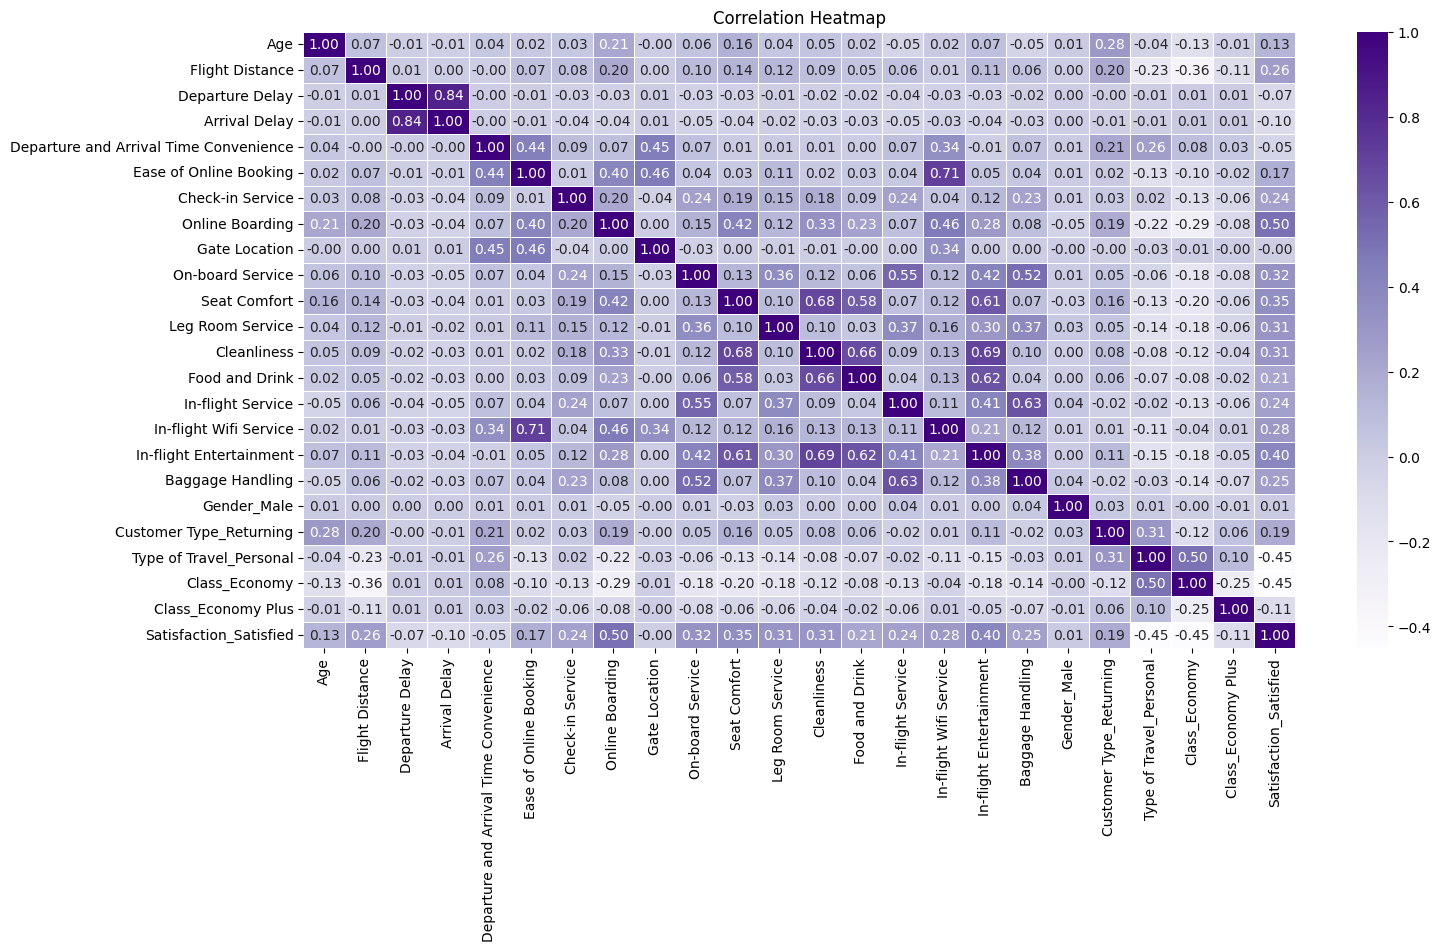

In [ ]:

correlation_matrix = final_df.corr()

plt.figure(figsize=(16, 8))


sns.heatmap(correlation_matrix, annot=True, cmap="Purples", fmt= '.2f', linewidths=0.6)

plt.title('Correlation Heatmap')

plt.show()

Arrival Delay and Departure Delay have a strong positive correlation(.96),indicating that they are closely related.The target variable (Satisfaction_Satisfied) shows a weak negative correalation with the Departure Delay, Arrival Delay.Features with correlation value less than 0.10 with target variable is dropped.

In [ ]:
cormatrix=final_df.corr()['Satisfaction_Satisfied']

In [ ]:
cormatrix

,Satisfaction_Satisfied
Age,0.134091
Flight Distance,0.258785
Departure Delay,-0.074264
Arrival Delay,-0.096676
Departure and Arrival Time Convenience,-0.054270
Ease of Online Booking,0.168877
Check-in Service,0.237252
Online Boarding,0.501749
Gate Location,-0.002793
On-board Service,0.322205


In [ ]:
lowcorr=cormatrix[abs(cormatrix)<0.10].index

In [ ]:
lowcorr

Index(['Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Gate Location',
       'Gender_Male'],
      dtype='object')

In [ ]:
final_df['Arrival Delay'].fillna(final_df['Arrival Delay'].median(),inplace=True)

In [ ]:
print(final_df.shape)

(129880, 24)


In [ ]:
newdf=final_df.drop(lowcorr,axis=1)

In [ ]:
newdf

,Age,Flight Distance,Ease of Online Booking,Check-in Service,Online Boarding,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied
0,48,10.044750,3,4,3,3,5,2,5,5,5,3,5,5,0.0,0.0,0.0,0.0,0.0
1,35,10.044750,2,3,5,5,4,5,5,3,5,2,5,5,1.0,0.0,0.0,0.0,1.0
2,41,10.126603,4,4,5,3,5,3,5,5,3,4,3,3,1.0,0.0,0.0,0.0,1.0
3,50,11.931081,2,3,4,5,5,5,4,4,5,2,5,5,1.0,0.0,0.0,0.0,1.0
4,49,13.388844,3,3,5,3,4,4,5,4,3,3,3,3,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,28,8.789733,4,4,4,5,1,4,4,4,5,4,4,4,1.0,1.0,0.0,1.0,0.0
129876,41,8.062427,3,5,3,5,2,5,2,2,4,3,2,5,1.0,1.0,0.0,1.0,0.0
129877,42,8.235342,2,4,2,3,3,4,3,3,4,2,3,5,1.0,1.0,0.0,1.0,0.0
129878,50,8.235342,4,3,4,4,4,5,3,3,4,5,3,5,1.0,1.0,0.0,1.0,1.0


TRAIN TEST SPLIT

PREPARING X AND y

In [ ]:
X = newdf.drop(columns=['Satisfaction_Satisfied'],axis=1)

In [ ]:
X.head()

,Age,Flight Distance,Ease of Online Booking,Check-in Service,Online Boarding,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,48,10.044750,3,4,3,3,5,2,5,5,5,3,5,5,0.0,0.0,0.0,0.0
1,35,10.044750,2,3,5,5,4,5,5,3,5,2,5,5,1.0,0.0,0.0,0.0
2,41,10.126603,4,4,5,3,5,3,5,5,3,4,3,3,1.0,0.0,0.0,0.0
3,50,11.931081,2,3,4,5,5,5,4,4,5,2,5,5,1.0,0.0,0.0,0.0
4,49,13.388844,3,3,5,3,4,4,5,4,3,3,3,3,1.0,0.0,0.0,0.0


In [ ]:
X.shape

(129880, 18)

In [ ]:
y=newdf['Satisfaction_Satisfied']

In [ ]:
y

,Satisfaction_Satisfied
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
129875,0.0
129876,0.0
129877,0.0
129878,1.0


## SLPITING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((90916, 18), (38964, 18), (90916,), (38964,))

##STANDARIZATION

Here standard scalar method is used scale down the value of features into mean of 0 and standard deviation of 1.

In [ ]:
scalar=StandardScaler()
X_train_sc=scalar.fit_transform(X_train)
X_test_sc=scalar.transform(X_test)

In [ ]:
X_train_sc=pd.DataFrame(X_train_sc,columns=X.columns)
X_test_sc=pd.DataFrame(X_test_sc,columns=X.columns)

In [ ]:
print(X_train_sc.head())

        Age  Flight Distance  Ease of Online Booking  Check-in Service  \
0 -0.228475         1.307942               -0.538908         -1.822409   
1  1.888274         0.444903               -1.251121          0.547730   
2  1.292938        -0.584888               -1.251121          0.547730   
3 -0.757662         0.234142                0.885520         -0.242316   
4  1.226790        -0.128024                0.885520         -0.242316   

   Online Boarding  On-board Service  Seat Comfort  Leg Room Service  \
0        -1.670462          0.476335     -1.855115          0.492254   
1        -1.670462         -0.300337     -0.337102         -0.267005   
2         1.290188          0.476335      1.180912          0.492254   
3         0.550025          1.253007     -1.855115         -1.026264   
4        -0.190137          0.476335     -0.337102         -1.785522   

   Cleanliness  Food and Drink  In-flight Service  In-flight Wifi Service  \
0    -1.743465       -0.906312          -0.54

###MODEL TRAINING AND EVALUTION MODEL TRAINING AND EVALUATION (WITHOUT HYPERPARAMETER TUNING)

Logistic Regression
Saved ['Logistic Regression'] as ['Logistic Regression'].pkl

--------------------------------------
Train Accuracy: 0.8724976901755467
Test Accuracy: 0.8730623139308079
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     22169
         1.0       0.87      0.83      0.85     16795

    accuracy                           0.87     38964
   macro avg       0.87      0.87      0.87     38964
weighted avg       0.87      0.87      0.87     38964

Confusion Matrix:
[[19996  2173]
 [ 2773 14022]]



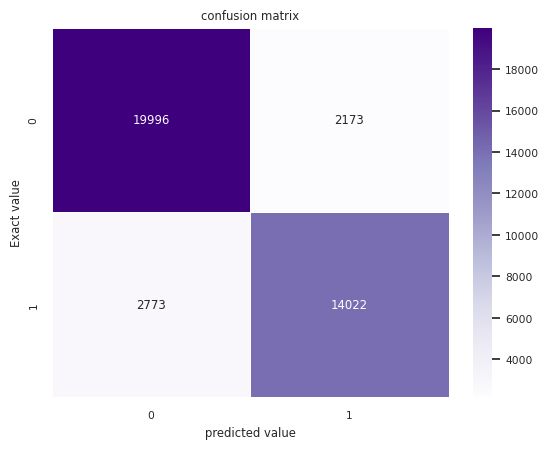

Decision Tree Classifier
Saved ['Decision Tree Classifier'] as ['Decision Tree Classifier'].pkl

--------------------------------------
Train Accuracy: 1.0
Test Accuracy: 0.9426906888409814
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     22169
         1.0       0.93      0.94      0.93     16795

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964

Confusion Matrix:
[[20980  1189]
 [ 1044 15751]]



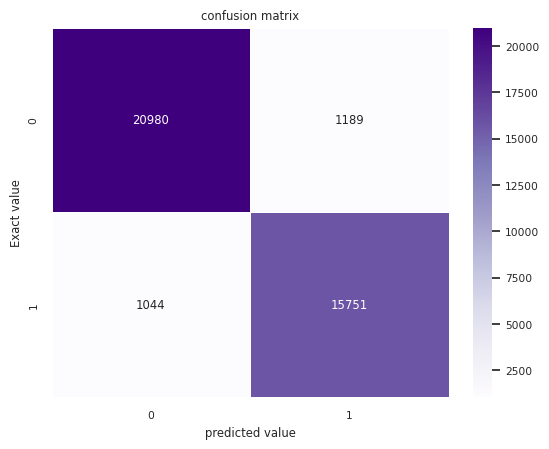

Random Forest Classifierr
Saved ['Random Forest Classifierr'] as ['Random Forest Classifierr'].pkl

--------------------------------------
Train Accuracy: 0.9999890008359364
Test Accuracy: 0.9625295144235705
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     22169
         1.0       0.97      0.94      0.96     16795

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964

Confusion Matrix:
[[21741   428]
 [ 1032 15763]]



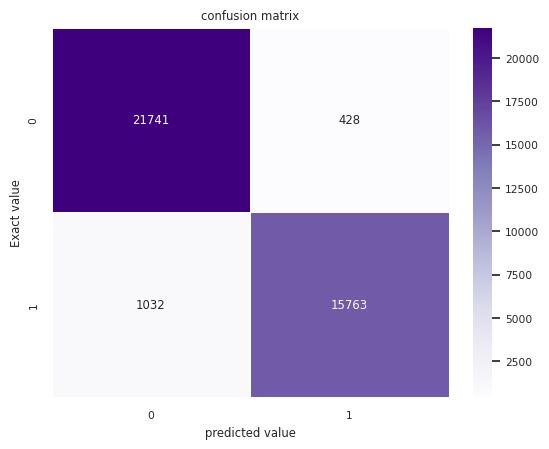

Support Vector Classifier
Saved ['Support Vector Classifier'] as ['Support Vector Classifier'].pkl

--------------------------------------
Train Accuracy: 0.956762286066259
Test Accuracy: 0.9546761112822092
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     22169
         1.0       0.96      0.93      0.95     16795

    accuracy                           0.95     38964
   macro avg       0.96      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964

Confusion Matrix:
[[21519   650]
 [ 1116 15679]]



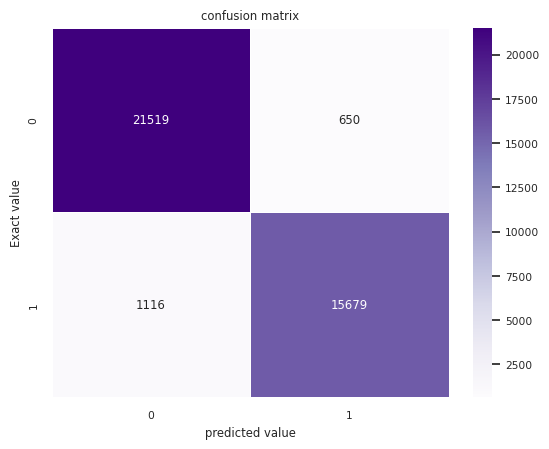

K-Neighbors Classifier
Saved ['K-Neighbors Classifier'] as ['K-Neighbors Classifier'].pkl

--------------------------------------
Train Accuracy: 0.9514496898235734
Test Accuracy: 0.9339390206344318
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     22169
         1.0       0.95      0.89      0.92     16795

    accuracy                           0.93     38964
   macro avg       0.94      0.93      0.93     38964
weighted avg       0.93      0.93      0.93     38964

Confusion Matrix:
[[21458   711]
 [ 1863 14932]]



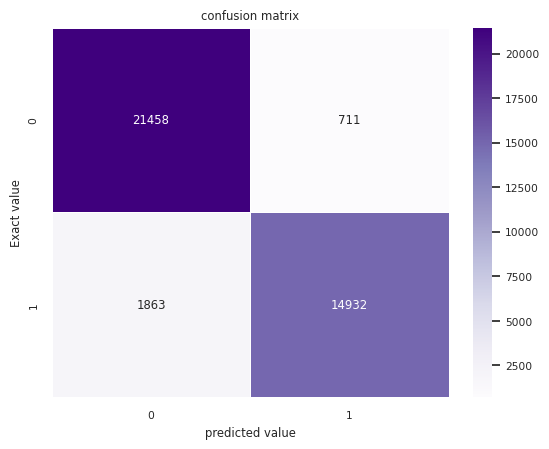

Gradient Boosting
Saved ['Gradient Boosting'] as ['Gradient Boosting'].pkl

--------------------------------------
Train Accuracy: 0.9402525408068987
Test Accuracy: 0.9394569346063033
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     22169
         1.0       0.94      0.91      0.93     16795

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964

Confusion Matrix:
[[21251   918]
 [ 1441 15354]]



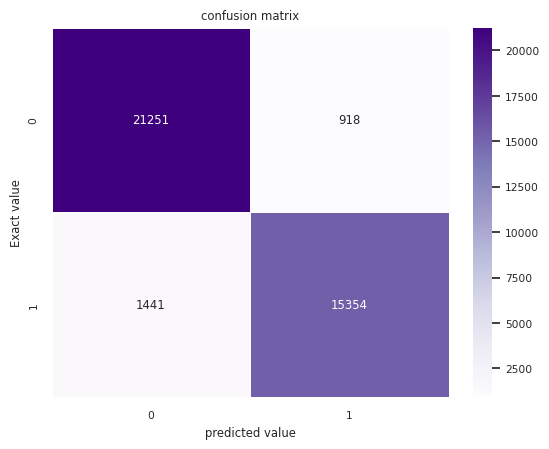

AdaBoost
Saved ['AdaBoost'] as ['AdaBoost'].pkl

--------------------------------------
Train Accuracy: 0.9239737779928725
Test Accuracy: 0.923236834000616
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93     22169
         1.0       0.92      0.90      0.91     16795

    accuracy                           0.92     38964
   macro avg       0.92      0.92      0.92     38964
weighted avg       0.92      0.92      0.92     38964

Confusion Matrix:
[[20831  1338]
 [ 1653 15142]]



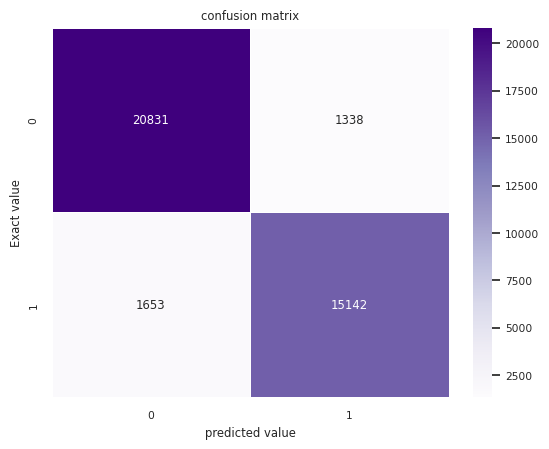

XGBoost
Saved ['XGBoost'] as ['XGBoost'].pkl

--------------------------------------
Train Accuracy: 0.9722051124114567
Test Accuracy: 0.962580843855867
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     22169
         1.0       0.97      0.94      0.96     16795

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964

Confusion Matrix:
[[21733   436]
 [ 1022 15773]]



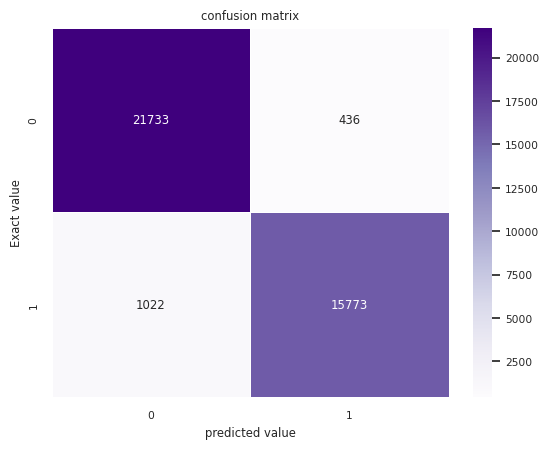

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifierr": RandomForestClassifier(),
    "Support Vector Classifier" :SVC(),
    "K-Neighbors Classifier":KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": xgb.XGBClassifier()
}
#Training the model,fitting X_train and y_Train to each model
for i in range(len(list(models))):

    model=list(models.values())[i]
    model.fit(X_train_sc,y_train)
    model_list = []

    y_train_pred=model.predict(X_train_sc)
    y_test_pred=model.predict(X_test_sc)



    # calculating the accuracy

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)


    # Evaluate the model's performance

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    #save the model


    with open('model.pkl','wb') as file:
      pickle.dump(model,file)
      print(f"Saved {model_list} as {model_list}.pkl")

    print("\n--------------------------------------")

    print(f"Train Accuracy: { train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")


    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("\n==========================================")
    con_matrix=confusion_matrix(y_test, y_test_pred)

    sns.set(font_scale=.7)
    sns.heatmap(con_matrix, annot=True, cmap="Purples", fmt= 'g', linewidths=0.6)

    plt.xlabel("predicted value")
    plt.ylabel("Exact value")
    plt.title("confusion matrix")

    plt.show()








Train accuracy is the accuracy the model achieves on the training dataset ,which is used for learning.Test accuracy is the accuracy of the model achieves on the unseen dataset.Precision,recal,F1 score and support are metrics used to evaluate the model performance for each class and give insight into whether the model favors precison or recall,as well as how balanced the predictions are across classes.The models based on Randomforest classifier,support verctor classifier and  XGBoost algorithms perform good with 96% accuracy score for train and test data.The logestic regression algorithm perform poorly with accuracy score of 85% compared with models based on K neighbour,Gradient boosting,decision tree and adaboosting with accuracy scoe in the range 92-94%.Performing hyperparameter tuning for the top performing model

##HYPERPARAMETER TUNING

In [ ]:
def hyperparameter_tuning():

      param_grid = {

          'Decision Tree Classifier': {
              "model":DecisionTreeClassifier(),
               "params":{
                  'max_depth': [10, 20, 30, None],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'criterion': ['gini', 'entropy']
                }
           },

          'Random Forest Classifier': {
                "model":RandomForestClassifier(random_state=42),
                "params":{
                    'n_estimators': [50, 100, 200],
                    'max_depth': [10, 20, 30, None],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4],
                    'bootstrap': [True, False]
                 }
            },

            'K-Neighbors Classifier': {

                "model":KNeighborsClassifier(),
                "params":{

                    'n_neighbors': [3, 5, 7, 9],
                    'weights': ['uniform', 'distance'],
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
                 }
            },
           'XGBoost':{

                "model":xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                "params":{
                    'n_estimators':[50,100,200],
                    'learning_rate': [0.01, 0.1,0.2],
                    'max_depth': [3,5,7]
                  }
            }
        }

      best_models={}

      for model_name,model_details in param_grid.items():


          model=model_details['model']
          param_grid=model_details['params']
          print(f"Tunning  {model_name}")

          # Perform GridSearchCV for each model
          grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
          grid_search.fit(X_train_sc, y_train)

          # Best parameters , best estimator and best score
          best_models[model_name]=grid_search.best_estimator_,
          best_params = grid_search.best_params_,
          best_score = grid_search.best_score_

          y_train_pred=grid_search.best_estimator_.predict(X_train_sc)
          y_test_pred= grid_search.best_estimator_.predict(X_test_sc)

          print(f"Best parameter:{grid_search.best_params_}")
          print(f"Best cross validation score {grid_search.best_score_}")


          print(f"Train Accuracy:{ accuracy_score(y_train, y_train_pred)}")
          print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
          print("Classification Report:")
          print(classification_report(y_test, y_test_pred))
          print("Confusion Matrix:")
          print(confusion_matrix(y_test, y_test_pred))
          print("="*50)
      return best_models


best_models =hyperparameter_tuning()




Tunning  Decision Tree Classifier
Best parameter:{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross validation score 0.9495138481873423
Train Accuracy:0.9753068766773725
Test Accuracy: 0.9513396981829381
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     22169
         1.0       0.95      0.93      0.94     16795

    accuracy                           0.95     38964
   macro avg       0.95      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964

Confusion Matrix:
[[21373   796]
 [ 1100 15695]]
Tunning  Random Forest Classifier
Best parameter:{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross validation score 0.9614699258565219
Train Accuracy:0.9944014254916627
Test Accuracy: 0.9634021147726106
Classification Report:
              precision    recall  f1-score   suppo

Hyperparameter tuning did not show significant improvements in any models.This suggests the model may have reached their optimal performance on this dataset.However XGBoost and Random forest performed well with best parameters(learning_rate and max_depth)

#Random unseen data generation and prediction based on saved model

In [ ]:
np.random.seed(42)
n_sample=20
random_data=pd.DataFrame({
    'age':np.random.normal(40,12,n_sample).clip(18,80),#age between 18 and 80
    'Type of Travel':np.random.choice(['Business' ,'Personal'],n_sample),
    'class_of_travel':np.random.choice(['Economy','Business','First'],n_sample,p=[0.7,0.2,0.1]),
    'Flight Distance':np.random.normal(1000,400,n_sample).clip(200,5200),
    'inflight_service_rating':np.random.randint(1,6,n_sample),
    'Ease of Online Booking':np.random.randint(1,6,n_sample),
    'On-board Service':np.random.randint(1,6,n_sample),
    'Customer Type':np.random.choice(['First_time','Returning'],n_sample),
    'Leg room service':np.random.randint(1,6,n_sample),
    'Check-in Service':np.random.randint(1,6,n_sample),
    'Baggage Handling':np.random.randint(1,6,n_sample),
    'Online boarding ': np.random.randint(1,6,n_sample),
    'Food and Drink':np.random.randint(1,6,n_sample),
    'In-flight Entertainment':np.random.randint(1,6,n_sample),
    'Cleanliness':np.random.randint(1,6,n_sample),
    'seat comfort':np.random.randint(1,6,n_sample),
    'In-flight Wifi Service':np.random.randint(1,6,n_sample)

})
random_data=pd.get_dummies(random_data,columns=['class_of_travel','Type of Travel','Customer Type'],drop_first=True).astype(int)
random_data['age']=random_data['age'].astype(int)
scalar=StandardScaler()
random_data_sc=scalar.fit_transform(random_data)


In [ ]:
random_data=pd.DataFrame(random_data_sc, columns= ['age','Type of Travel_Personal','class_of_travel_Economy','class_of_travel_First','Flight Distance','inflight_service_rating','Ease of Online Booking','On-board Service','Leg room service','Check-in Service','Baggage Handling','On-board Service','Customer Type_Returning','Food and Drink','In-flight Entertainment','Cleanliness','Gate Location','In-flight Wifi Service'])

In [ ]:
random_data

,age,Type of Travel_Personal,class_of_travel_Economy,class_of_travel_First,Flight Distance,inflight_service_rating,Ease of Online Booking,On-board Service,Leg room service,Check-in Service,Baggage Handling,On-board Service,Customer Type_Returning,Food and Drink,In-flight Entertainment,Cleanliness,Gate Location,In-flight Wifi Service
0,0.677980,0.956763,-0.654654,-0.494543,0.865161,-0.420084,-0.043073,0.483494,-0.586588,0.173032,-0.146647,1.087922,-0.345547,-0.535303,-1.362770,2.0,1.224745,-1.362770
1,0.040952,0.247471,-1.382047,-2.016215,0.865161,0.280056,-0.043073,1.289317,-1.319824,-1.211225,1.319824,1.087922,0.518321,-1.300022,-1.362770,-0.5,1.224745,-1.362770
2,0.859989,-0.111862,1.527525,0.266293,0.865161,-1.120224,-1.765995,1.289317,0.879883,1.557289,-0.146647,-0.155417,-0.345547,0.994135,0.733799,-0.5,-0.816497,0.733799
3,1.861034,-0.343085,0.072739,1.027128,0.865161,1.680336,1.679849,-1.128152,1.613118,-0.519096,-0.146647,0.466252,-0.345547,1.758854,0.733799,-0.5,1.224745,0.733799
4,-0.050052,-1.814788,0.800132,0.266293,0.173032,-1.120224,0.818388,-1.128152,1.613118,-0.519096,-0.146647,-1.398757,0.518321,0.994135,0.733799,-0.5,-0.816497,0.733799
5,-0.050052,-0.864899,0.072739,1.027128,-0.519096,-1.120224,-0.904534,-0.322329,0.146647,-0.519096,-0.879883,1.087922,-0.345547,-1.300022,0.733799,-0.5,1.224745,-1.362770
6,1.861034,-0.543061,0.072739,1.027128,0.865161,0.280056,-0.043073,-1.128152,-1.319824,0.173032,1.319824,1.087922,-0.345547,0.994135,0.733799,-0.5,-0.816497,-1.362770
7,1.041997,1.353592,-1.382047,-0.494543,-1.211225,-1.120224,-1.765995,0.483494,-1.319824,1.557289,-1.613118,-1.398757,-0.345547,0.229416,0.733799,-0.5,1.224745,0.733799
8,-0.323065,0.463071,0.072739,1.027128,-1.211225,-0.420084,-1.765995,1.289317,0.146647,-1.211225,0.586588,1.087922,-1.209416,0.994135,0.733799,-0.5,1.224745,0.733799
9,0.768985,-2.170996,1.527525,0.266293,-1.211225,-0.420084,0.818388,-1.128152,0.146647,0.865161,-1.613118,-0.155417,-1.209416,-0.535303,-1.362770,2.0,-0.816497,0.733799


In [ ]:
with open('model.pkl','rb') as file:
  loaded_model=pickle.load(file)

In [ ]:
X_unseen = random_data.values
y_unseen_pred=model.predict(X_unseen)
print(f"loaded model ={type(model)}")
print("Predictions on unseen data where O is dissatisfied and 1 is satisfied.")
print(y_unseen_pred)

loaded model =<class 'xgboost.sklearn.XGBClassifier'>
Predictions on unseen data where O is dissatisfied and 1 is satisfied.
[0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0]


The XGBoost model predicts the data for 20 random inputs generated with in the range of the given original dataset.

##CONCLUSION

After comparing multiple models and performing hyperparameter tuning ,the best_performing models were XGboost and Random forest,achieving a high accuracy of 96%,making them the preferred models for this dataset.The XGBoost classifier also achieved satisfactory performance when tested on unseen data.The other models K-Nearest Neighbors(KNN),Adaboost ,SVC,Gradent Boost reached an average of 92%-94% accuracy but didnt match the top models in capturing the complexities of the dataset. While Logistic Regression performed poorly with low accuracy of 87%. The project successfully developed a machine learning model that predicts airline passenger satisfaction based on various factors including in-flight service quality,seat comfort and check in ease.